# Extract MILC output with python script
Averaging over multiple runs to get uncertainty

Sept 29, 2023


## Description of columns in parse script : 



- Solve time =  2 x sum of all mass-solve times


- quda-total-time = solve-time + mg-setup + epsilon

- summed_time = quda_total_time + contractions + epsilon

- milc_total_time = summed_time + err

In [1]:
! hostname

jupyter-venkitesh


In [2]:
import os, glob
import subprocess as sp
import numpy as np
import shutil

import re

import pandas as pd

import matplotlib.pyplot as plt
from ipywidgets import *

import itertools

import gvar as gv

In [3]:
from python_parse import *

In [4]:
%matplotlib widget

In [5]:
top_dir='/gpfs/alpine/lgt104/proj-shared/ayyar/runs_frontier/runs_jan27_2023'

runs_lst=[
['cg_144_1','cg_split','/autofs/nccs-svm1_home1/venkitesh/mg_output_files/10_split_mass/multiple_run_avg/output-cg_1.kpp'],
['cg_144_2','cg_split','/autofs/nccs-svm1_home1/venkitesh/mg_output_files/10_split_mass/multiple_run_avg/output-cg_2.kpp'],
['cg_144_3','cg_split','/autofs/nccs-svm1_home1/venkitesh/mg_output_files/10_split_mass/multiple_run_avg/output-cg_3.kpp'],
['cg_144_4','cg_split','/autofs/nccs-svm1_home1/venkitesh/mg_output_files/10_split_mass/multiple_run_avg/output-cg_4.kpp'],

['mg_144_1','mg','/autofs/nccs-svm1_home1/venkitesh/mg_output_files/10_split_mass/multiple_run_avg/output-full_1.kpp'],
['mg_144_2','mg','/autofs/nccs-svm1_home1/venkitesh/mg_output_files/10_split_mass/multiple_run_avg/output-full_2.kpp'],
['mg_144_3','mg','/autofs/nccs-svm1_home1/venkitesh/mg_output_files/10_split_mass/multiple_run_avg/output-full_3.kpp'],
    
# ['cg_frontier_144_split_6_light','cg_split','/autofs/nccs-svm1_home1/venkitesh/mg_output_files/6_split_mass/output-cg_6split.kpp'],
]


In [6]:
## Parse output files

df_data=pd.DataFrame([])

op_files=[]
for count,i in enumerate(runs_lst):    
    # print(i)
    dict1 = f_extract(fname=i[2],run_type=i[1],m_light=10)
    dict1['name']=i[0]
    
    # f_print_dict(dict1)
    
    df_data=pd.concat([df_data,pd.DataFrame(dict1,index=[count])])
    count+=1

cols=['name', 'startup', 'loading', 'mg-setup',
       'make/save-src', 'mass-01', 'mass-02', 'mass-03', 'mass-01-10',
       'mass-11-20', 'solve-time','contractions', 'quda-total-time','summed-time', 'error',
       'milc-total-time']

# df_data=df_data[cols].copy()
    
    

120
120
120
120


In [11]:
df_data

,startup,loading,mg-setup,mass-00,mass-01,mass-02,mass-03,mass-04,mass-05,mass-06,...,mass-11-20,mass-01-10,make/save-src,contractions,quda-total-time,milc-total-time,solve-time,summed-time,error,name
0,30.58971,704.7725,0.00,113.006390,65.740750,47.692905,44.067570,43.515251,29.131094,23.016656,...,59.571659,410.258939,22.58224,102.72700,1041.081,1838.551,939.661197,1800.332647,38.218353,cg_144_1
1,28.51822,628.4113,0.00,93.328395,63.844910,46.298924,42.788607,42.242176,28.280019,22.339446,...,57.886911,381.900543,22.45763,84.68641,889.608,1661.997,879.574907,1643.648468,18.348532,cg_144_2
2,29.87729,627.7793,0.00,92.057240,62.946390,45.655233,42.184292,41.649916,27.881560,22.037485,...,57.262668,376.645216,42.00860,97.63671,878.041,1683.371,867.815768,1665.117668,18.253332,cg_144_3
3,34.84135,625.5202,0.00,92.561735,62.927555,46.157216,51.249286,41.635448,27.888438,32.888516,...,59.916073,407.015142,22.46000,84.65571,949.556,1719.711,933.862429,1701.339689,18.371311,cg_144_4
4,30.66426,629.6856,2136.59,28.614217,21.154911,21.057078,24.899024,34.496870,48.983990,68.875325,...,68.248357,651.128496,22.67341,85.51551,3585.718,4360.870,1438.753708,4343.882488,16.987512,mg_144_1
5,29.85888,643.8882,2229.79,26.444628,19.213769,21.556784,26.775707,34.966525,49.852900,69.753320,...,66.466271,656.224023,22.69951,85.28067,3683.316,4472.511,1445.380589,4456.897850,15.613151,mg_144_2
6,30.20250,628.5838,2212.47,27.107502,18.709239,18.669705,24.341126,32.401460,42.655435,57.754900,...,66.921384,555.740123,22.67229,97.15018,3465.907,4251.542,1245.323014,4236.401784,15.140216,mg_144_3


In [12]:
df_data.head(4)

,startup,loading,mg-setup,mass-00,mass-01,mass-02,mass-03,mass-04,mass-05,mass-06,...,mass-11-20,mass-01-10,make/save-src,contractions,quda-total-time,milc-total-time,solve-time,summed-time,error,name
0,30.58971,704.7725,0.0,113.006390,65.740750,47.692905,44.067570,43.515251,29.131094,23.016656,...,59.571659,410.258939,22.58224,102.72700,1041.081,1838.551,939.661197,1800.332647,38.218353,cg_144_1
1,28.51822,628.4113,0.0,93.328395,63.844910,46.298924,42.788607,42.242176,28.280019,22.339446,...,57.886911,381.900543,22.45763,84.68641,889.608,1661.997,879.574907,1643.648468,18.348532,cg_144_2
2,29.87729,627.7793,0.0,92.057240,62.946390,45.655233,42.184292,41.649916,27.881560,22.037485,...,57.262668,376.645216,42.00860,97.63671,878.041,1683.371,867.815768,1665.117668,18.253332,cg_144_3
3,34.84135,625.5202,0.0,92.561735,62.927555,46.157216,51.249286,41.635448,27.888438,32.888516,...,59.916073,407.015142,22.46000,84.65571,949.556,1719.711,933.862429,1701.339689,18.371311,cg_144_4


In [13]:
df_temp=df_data.iloc[:4]
df_temp

,startup,loading,mg-setup,mass-00,mass-01,mass-02,mass-03,mass-04,mass-05,mass-06,...,mass-11-20,mass-01-10,make/save-src,contractions,quda-total-time,milc-total-time,solve-time,summed-time,error,name
0,30.58971,704.7725,0.0,113.006390,65.740750,47.692905,44.067570,43.515251,29.131094,23.016656,...,59.571659,410.258939,22.58224,102.72700,1041.081,1838.551,939.661197,1800.332647,38.218353,cg_144_1
1,28.51822,628.4113,0.0,93.328395,63.844910,46.298924,42.788607,42.242176,28.280019,22.339446,...,57.886911,381.900543,22.45763,84.68641,889.608,1661.997,879.574907,1643.648468,18.348532,cg_144_2
2,29.87729,627.7793,0.0,92.057240,62.946390,45.655233,42.184292,41.649916,27.881560,22.037485,...,57.262668,376.645216,42.00860,97.63671,878.041,1683.371,867.815768,1665.117668,18.253332,cg_144_3
3,34.84135,625.5202,0.0,92.561735,62.927555,46.157216,51.249286,41.635448,27.888438,32.888516,...,59.916073,407.015142,22.46000,84.65571,949.556,1719.711,933.862429,1701.339689,18.371311,cg_144_4


In [14]:
gv.dataset.avg_data(df_temp.loading.values)

647(17)

In [15]:
df_avg=pd.DataFrame([])
dict1={}


df_temp=df_data.iloc[:4]
df_temp=df_temp.drop(columns=['name'])

dict1['name']='cg'
for col in df_temp.columns:
    dict1[col]=gv.dataset.avg_data(df_temp[col].values)

df_avg=pd.concat([df_avg,pd.DataFrame(dict1,index=[df_avg.shape[0]+1])])


df_temp=df_data.iloc[4:7]
df_temp=df_temp.drop(columns=['name'])

dict1['name']='mg'
for col in df_temp.columns:
    dict1[col]=gv.dataset.avg_data(df_temp[col].values)

df_avg=pd.concat([df_avg,pd.DataFrame(dict1,index=[df_avg.shape[0]+1])])

In [16]:
df_avg

,name,startup,loading,mg-setup,mass-00,mass-01,mass-02,mass-03,mass-04,mass-05,...,mass-09,mass-11-20,mass-01-10,make/save-src,contractions,quda-total-time,milc-total-time,solve-time,summed-time,error
1,cg,31.0(1.2),647(17),0(0),97.7(4.4),63.86(57),46.45(38),45.1(1.8),42.26(38),28.30(25),...,12.89(46),58.66(56),394.0(7.4),27.4(4.2),92.4(4.0),940(32),1726(34),905(16),1703(30),23.3(4.3)
2,mg,30.24(19),634.1(4.0),2193(23),27.39(52),19.69(61),20.43(73),25.34(60),33.95(64),47.2(1.9),...,159.4(7.9),67.21(44),621(27),22.6817(73),89.3(3.2),3578(51),4362(52),1376(54),4346(52),15.91(45)


In [17]:
masses = [0.000569, 0.0010, 0.001555, 0.00225, 0.00311, 0.004665, 0.00622, 0.00933, 0.01244, 0.01555]

In [18]:
# mass values for 6 light mass test ( very low values to start) 
# masses = [0.00005, 0.0001, 0.0002, 0.0005, 0.0008, 0.001]

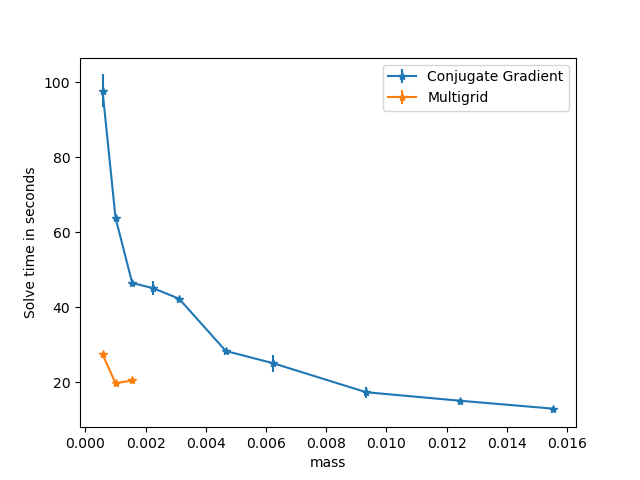

In [20]:
df=df_avg.copy()
m_light=10
light_mass_columns=['mass-{:02d}'.format(count) for count in range(m_light)] # keys for all light masses

plt.figure()

x=masses[:m_light]
y = df.iloc[0][light_mass_columns].values

plt.errorbar(x,gv.mean(y),gv.sdev(y),marker='*', label='Conjugate Gradient')

x=masses[:3]
y = df.iloc[1][light_mass_columns].values[:3]
plt.errorbar(x,gv.mean(y),gv.sdev(y), marker='*', label='Multigrid')

plt.ylabel("Solve time in seconds")
plt.xlabel("mass")
plt.legend(loc='best')
# plt.yscale('log')

plt.show()

In [15]:
sub_list=['name']+light_mass_columns
sub_list
df[sub_list]

,name,mass-00,mass-01,mass-02,mass-03,mass-04,mass-05,mass-06,mass-07,mass-08,mass-09
0,cg_144_1,113.006390,65.74075,47.692905,44.067570,43.515251,29.131094,23.016656,15.945133,15.462891,12.680299
1,cg_144_2,93.328395,63.84491,46.298924,42.788607,42.242176,28.280019,22.339446,15.470189,15.002822,12.305055
2,cg_144_3,92.057240,62.94639,45.655233,42.184292,41.649916,27.881560,22.037485,15.273115,14.811545,12.148438


In [16]:
# sub_list=['name','mg-setup','solve-time','milc-total-time']
# df[sub_list]

## Plots

,name,summed-time
0,cg_144_1,1800.332647
1,cg_144_2,1643.648468
2,cg_144_3,1665.117668
3,cg_144_4,1701.339689
4,mg_144_1,4343.882488
5,mg_144_2,4456.897850
6,mg_144_3,4236.401784


['cg_144_1' 'cg_144_2' 'cg_144_3' 'cg_144_4' 'mg_144_1' 'mg_144_2'
 'mg_144_3'] [1800.3326475 1643.6484675 1665.1176684 1701.3396891 4343.8824878
 4456.8978495 4236.4017838]


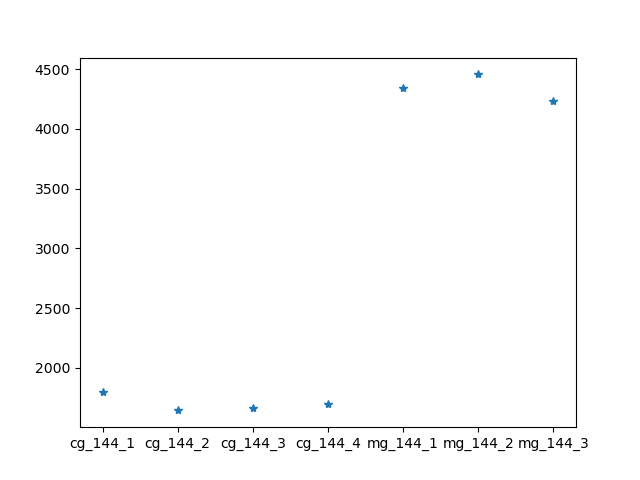

In [17]:
y_options=['mass-01', 'mass-02', 'mass-03', 'mass-04-10', 'mass-11-20',
       'startup', 'loading', 'mg-setup', 'solve-time', 'make/save-src',
       'contractions', 'summed-time', 'quda-total-time', 'milc-total-time',
       'error', 'mass-01-10']


def f_compare_plot(df,y,x='name'):
    # df.plot(x=x,y=y,kind='line',marker='D')
    
    display(df[[x,y]])
    
    x=df.name.values
    y=df[y].values
    print(x,y)
    plt.figure()
    plt.plot(x,y,marker='*',linestyle='')
    # plt.plot(y,marker='*')
    # plt.legend()
    plt.show()
    
df=df_data.copy()
# df.plot(x='name',y='summed-time',kind='line',marker='*')
f_compare_plot(df,'summed-time','name')

In [18]:
interact(f_compare_plot,df=fixed(df),y=y_options,x=fixed('name'))

interactive(children=(Dropdown(description='y', options=('mass-01', 'mass-02', 'mass-03', 'mass-04-10', 'mass-…

<function __main__.f_compare_plot(df, y, x='name')>

In [19]:
def f_plot_together(df,labels_lst,markers_lst): 
    plt.figure()
    x=df.name.values

    for label,marker in zip(labels_lst,markers_lst):
        y=df[label].values
        plt.plot(x,y,marker=marker,label=label)

    plt.legend()


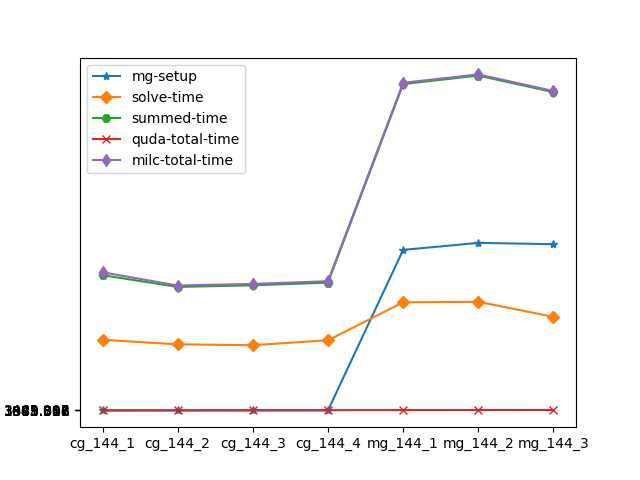

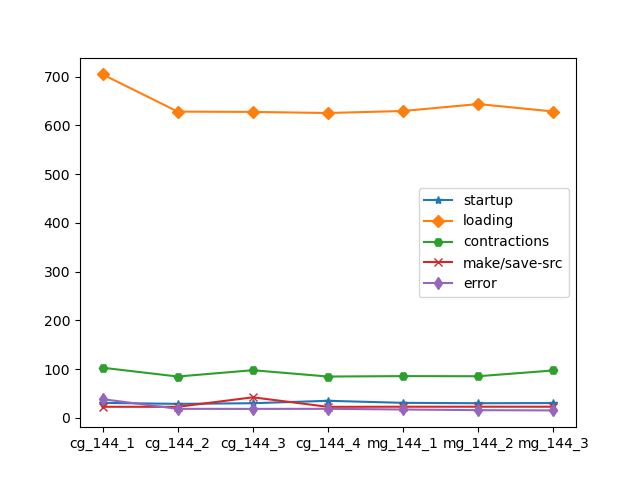

In [20]:
markers=['*','D','H','x','d','p','1','2','h','v']
labels=['startup', 'loading', 'mg-setup', 'solve-time', 'make/save-src',
       'contractions', 'summed-time', 'quda-total-time', 'milc-total-time',
       'error']

labels1=['mg-setup', 'solve-time','summed-time', 'quda-total-time', 'milc-total-time']

labels2=['startup', 'loading','contractions','make/save-src','error']

f_plot_together(df,labels1,markers)
f_plot_together(df,labels2,markers)


In [92]:
90 * 8 * 5 * 4 * 12

172800